# Tau Notebook

In [1]:
import os
RunningInCOLAB = 'google.colab' in str(get_ipython())  # checks to see if we are in google colab
if RunningInCOLAB:                                     # installs packages and repo if in colab
    !pip install ipywidgets &> /dev/null               
    !pip install neuron &> /dev/null


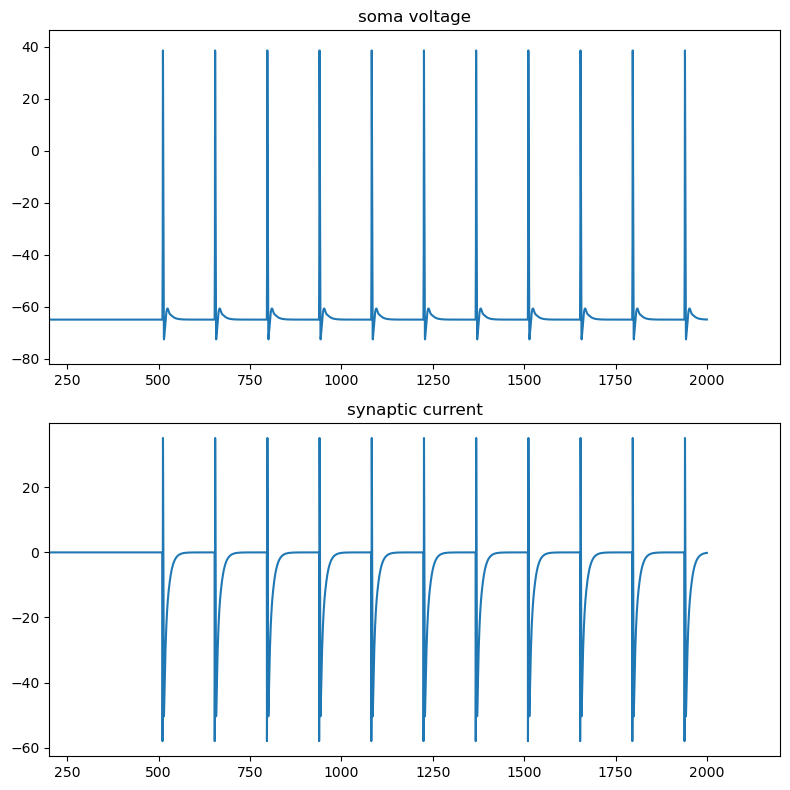

In [2]:
from neuron import h
from neuron.units import ms, mV
import matplotlib.pyplot as plt
from matplotlib import gridspec
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
from IPython.display import clear_output


def model(weight,input_freqency,tau_r,tau_d):
    h.load_file('stdrun.hoc')
    
    soma = h.Section(name='soma')
    soma.insert('hh')

    h.dt = 0.1 # time step (resolution) of the simulation in ms
    h.tstop = 2000 # how long to run the simulation in ms
    h.v_init= -70 # initial membrane potential in mV
    
    t = h.Vector()      # Vectors are used to record data in the simulation
    soma_v = h.Vector()
    i = h.Vector()

    conn = h.Exp2Syn(soma(0.5)) # makes a syn connected to soma
   

    conn.tau1 = tau_r # tau raise
    conn.tau2 = tau_d # tau decay

    nstim = h.NetStim(0.9)               # creating a stimulation for the cell

    nstim.interval=1000/input_freqency   # Hz of input
    nstim.start=500                      # when stim should start
    nstim.number = 100                   # 
    nstim.noise = 0                      # level of noise
    nc = h.NetCon(nstim,conn,10,10,weight) # makes connections with our assigned weight
    
    
    
    t.record(h._ref_t) # derefences and records data
    soma_v.record(soma(0.5)._ref_v)
    i.record(conn._ref_i)

    h.finitialize(h.v_init * mV)  # runs sims
    h.continuerun(h.tstop * ms)   
    
    plot_model(t,soma_v,i)
    
def plot_model(t,soma_v,i):         # ploting code
    fig = plt.figure(figsize=(8, 8),tight_layout=True) 
    gs = gridspec.GridSpec(2, 1, width_ratios=[1],height_ratios=[1,1]) 
    
    ax0 = plt.subplot(gs[0,0])  # top plot
    ax1 = plt.subplot(gs[1,0])  # bottom plot
    
    ax0.plot(t ,soma_v)
    ax0.set_title('soma voltage')   
    ax0.set_xlim(200,2200)
    
    ax1.plot(t,i)
    ax1.set_title('synaptic current')
    ax1.set_xlim(200,2200)
    
    plt.show()
    
weight = 1         # inital values used by the slider
input_freqency = 7  
tau_r = 0.1
tau_d = 10

# widgets the get displayed below
w_run = widgets.Button(description='Run',icon='history',button_style='primary')    
w_weight = widgets.FloatSlider(value=weight,min=0.001,max=10, step=0.2,description='weight')
w_input_freqency = widgets.FloatSlider(value=input_freqency,min=0.001,max=50, step=1,description='Input Freq')
w_tau_r = widgets.FloatSlider(value=tau_r,min=0,max=10, step=0.01,description='tau rise time')
w_tau_d = widgets.FloatSlider(value=tau_d,min=0,max=200, step=10,description='tau decay time')


def run_model(*arges):
    clear_output()  #               Removes the sliders and then updated the values and displays the new valuesgit
    
    weight = w_weight.value
    input_freqency = w_input_freqency.value
    tau_r = w_tau_r.value
    tau_d = w_tau_d.value
    display(ui)
    model(weight,input_freqency,tau_r,tau_d)



w_run.on_click(run_model)

ui = VBox([HBox([w_run]), HBox([w_weight,w_tau_r]),HBox([w_input_freqency,w_tau_d])])
ui